In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ds_salaries.csv')
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
df.head()


Linhas:  607
Colunas:  12


,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 4. Analise estatistica
Tabelas de frequencia
Media, mediana, amplitude, desvio padrao

-> Obs: Para facilitar o entendimento da analise, irei modificar os nomes das colunas para portugue

Primeiro, devemos identificar as variaveis categoricas e numericas.
Para as categoricas faremos a tabela de frequencia, e para numericas medidas como media, mediana, amplitude e desvio padrao.

In [39]:
numerical_vars = df.select_dtypes(include=['number']).columns
print("# Variaveis numericas: \n-", "\n- ".join(numerical_vars))

print("----")
all_columns = df.columns
categorical_vars = all_columns.difference(numerical_vars)
print("# Variaveis categoricas: \n-", "\n- ".join(categorical_vars))

# Variaveis numericas: 
- id
- work_year
- salary
- salary_in_usd
- remote_ratio
----
# Variaveis categoricas: 
- company_location
- company_size
- employee_residence
- employment_type
- experience_level
- job_title
- salary_currency


### 4.1 Frequencias
> company_location, company_size, employee_residence, employment_type, experience_level, job_title, salary_currency

In [95]:
print("Localizacao da empresa (company_location)")
freq_location_all = df['company_location'].value_counts()

# Percebi que tem muitos com frequencia 1 ou 2, entao vou cortar esses e mostrar como outros para nao poluir a visualizacao dat abela
freq_location_main = freq_location_all[freq_location_all > 2].rename_axis('Localização da Empresa').reset_index(name='Frequencia')

# Calcular o outros
others_sum = freq_location_all[freq_location_all <= 2].sum()
others_row = pd.DataFrame([['Outros', others_sum]], columns=['Localização da Empresa', 'Frequencia'])

# Juntar as tabelas para ter outros na tabela
freq_location = pd.concat([freq_location_main, others_row])
freq_location


# freq_md = freq_location.to_markdown(index=False)
# print(freq_md)

Localizacao da empresa (company_location)


,Localização da Empresa,Frequencia
0,US,355
1,GB,47
2,CA,30
3,DE,28
4,IN,24
5,FR,15
6,ES,14
7,GR,11
8,JP,6
9,NL,4


In [77]:
print("Tamanho da Empresa ( company_size)")
freq_size = df['company_size'].value_counts().rename_axis('Tamanho da Empresa').reset_index(name='Frequencia')
freq_size

# freq_md = freq_size.to_markdown(index=False)
# print(freq_md)

Tamanho da Empresa ( company_size)


,Tamanho da Empresa,Frequencia
0,M,326
1,L,198
2,S,83


In [56]:
print("Residencia do empregado (employee_residence)")
freq_employee_residence_all = df['employee_residence'].value_counts()

freq_employee_residence_main = freq_employee_residence_all[freq_employee_residence_all > 2].rename_axis('Residencia do Empregado').reset_index(name='Frequencia')

others_sum = freq_employee_residence_all[freq_employee_residence_all <= 2].sum()
others_row = pd.DataFrame([['Outros', others_sum]], columns=['Residencia do Empregado', 'Frequencia'])


freq_employee_residence = pd.concat([freq_employee_residence_main, others_row])
freq_employee_residence

Residencia do empregado (employee_residence)


,Residencia do Empregado,Frequencia
0,US,332
1,GB,44
2,IN,30
3,CA,29
4,DE,25
5,FR,18
6,ES,15
7,GR,13
8,JP,7
9,PT,6


In [57]:
print("Vinculo empregaticio (employment_type)")
freq_employment_type = df['employment_type'].value_counts().rename_axis('Vinculo Empregaticio').reset_index(name='Frequencia')
freq_employment_type

Vinculo empregaticio (employment_type)


,Vinculo Empregaticio,Frequencia
0,FT,588
1,PT,10
2,CT,5
3,FL,4


In [75]:
print("Nivel de experiencia (experience_level)")
freq_exp = df['experience_level'].value_counts().rename_axis('Nível de Experiência').reset_index(name='Frequencia')
freq_exp


# table_md = freq_exp.to_markdown(index=False)
# print(table_md)


Nivel de experiencia (experience_level)


,Nível de Experiência,Frequencia
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [60]:
print("Titulo do emprego (job_title)")
freq_job_title_all = df['job_title'].value_counts()

freq_job_title_main = freq_job_title_all[freq_job_title_all > 3].rename_axis('Titulo do Emprego').reset_index(name='Frequencia')

others_sum = freq_job_title_all[freq_job_title_all <= 3].sum()
others_row = pd.DataFrame([['Outros', others_sum]], columns=['Titulo do Emprego', 'Frequencia'])

freq_job_title = pd.concat([freq_job_title_main, others_row])
freq_job_title

Titulo do emprego (job_title)


,Titulo do Emprego,Frequencia
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Principal Data Scientist,7


In [61]:
print("Moeda do salario (salary_currency)")
freq_salary_currency = df['salary_currency'].value_counts().rename_axis('Moeda do Salario').reset_index(name='Frequencia')
freq_salary_currency

Moeda do salario (salary_currency)


,Moeda do Salario,Frequencia
0,USD,398
1,EUR,95
2,GBP,44
3,INR,27
4,CAD,18
5,JPY,3
6,PLN,3
7,TRY,3
8,CNY,2
9,MXN,2


### 4.2 Estatistica descritiva
> work_year, salary, salary_in_usd, remote_ratio

In [99]:
print("Estatistica descritiva - variaveis numericas")
num_vars = ['salary_in_usd',  'remote_ratio', 'work_year', 'salary']
stats = df[num_vars].agg(['count', 'mean', 'median', 'std', 'min', 'max']).T
stats['range'] = stats['max'] - stats['min']
stats = stats.rename(columns={
    'count':'n',
    'mean':'media',
    'median':'mediana',
    'std':'desvio_padrao',
    'min':'minimo',
    'max':'maximo',
    'range':'amplitude',
})

name_mapping = {
    'salary_in_usd': 'Salario em Dolar (salary_in_usd)',
    'remote_ratio': 'Remoto (remote_ratio)',
    'work_year': 'Ano de Trabalho (work_year)',
    'salary': 'Salario (salary)',
}
stats = stats.rename(index=name_mapping)
stats


# stats_md = stats.to_markdown()
# print(stats_md)

Estatistica descritiva - variaveis numericas


,n,media,mediana,desvio_padrao,minimo,maximo,amplitude
Salario em Dolar (salary_in_usd),607.0,112297.869852,101570.0,7.095726e+04,2859.0,600000.0,597141.0
Remoto (remote_ratio),607.0,70.922570,100.0,4.070913e+01,0.0,100.0,100.0
Ano de Trabalho (work_year),607.0,2021.405272,2022.0,6.921330e-01,2020.0,2022.0,2.0
Salario (salary),607.0,324000.062603,115000.0,1.544357e+06,4000.0,30400000.0,30396000.0


## Visualizacao de Dados

- Grafico de barras, setores para variaveis categoricas
- Historgrama, boxplot, grafico de dispersao para variaveis numericas

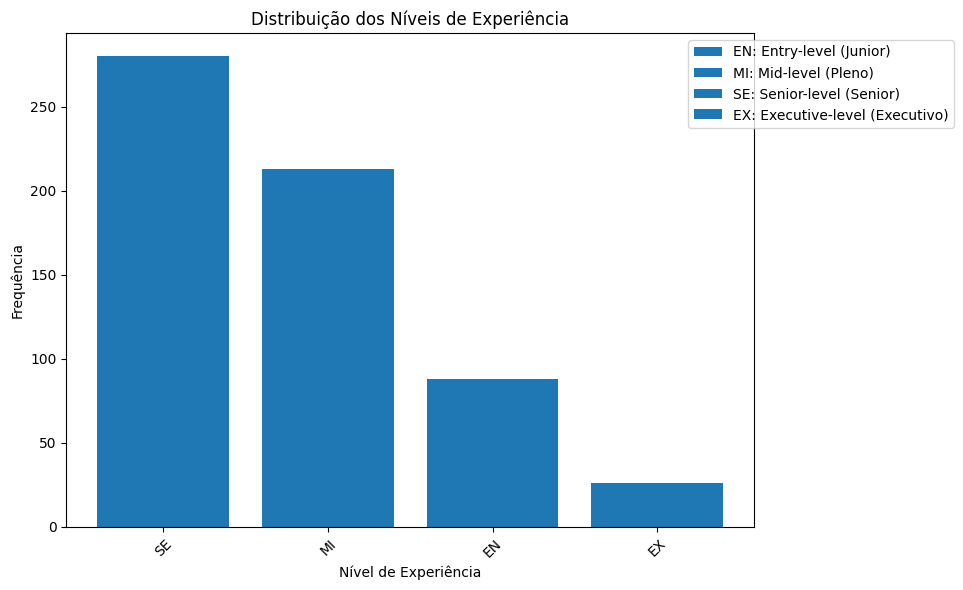

In [85]:
plt.figure(figsize=(10, 6))
bars = plt.bar(freq_exp['Nível de Experiência'], freq_exp['Frequencia'])
plt.title('Distribuição dos Níveis de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

legend_labels = [
    'EN: Entry-level (Junior)',
    'MI: Mid-level (Pleno)',
    'SE: Senior-level (Senior)',
    'EX: Executive-level (Executivo)'
]
plt.legend(bars, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


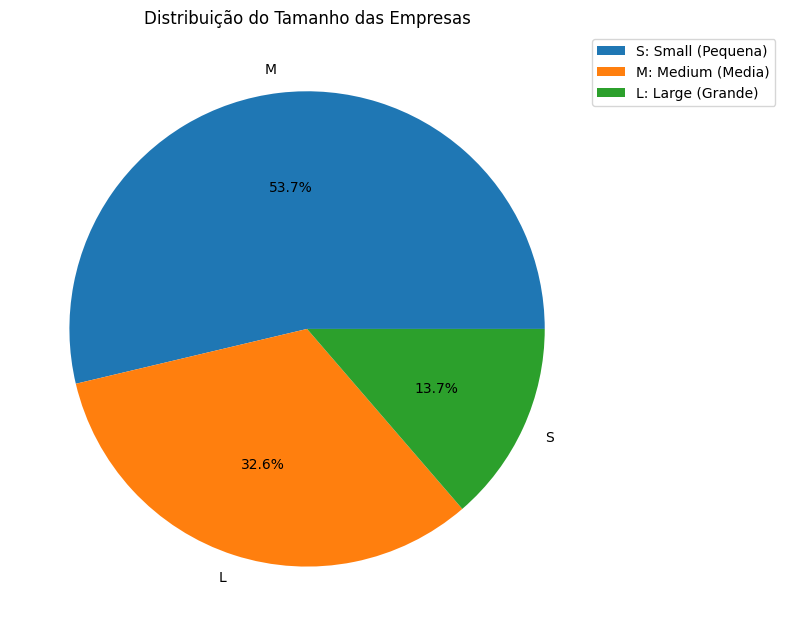

In [93]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(freq_size['Frequencia'], labels=freq_size['Tamanho da Empresa'], autopct='%1.1f%%') # type: ignore
plt.title('Distribuição do Tamanho das Empresas')

legend_labels = [
    'S: Small (Pequena)',
    'M: Medium (Media)',
    'L: Large (Grande)'
]
plt.legend(wedges, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


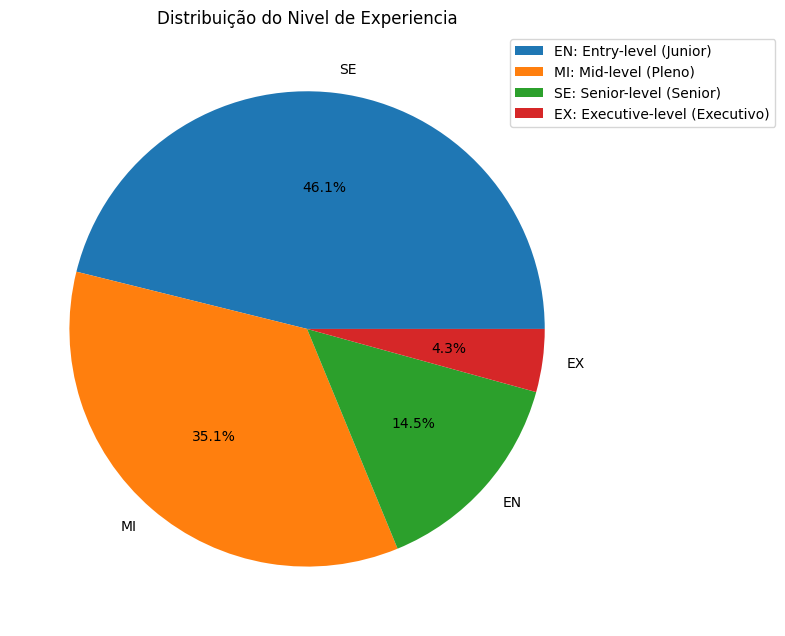

In [130]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(freq_exp['Frequencia'], labels=freq_exp['Nível de Experiência'], autopct='%1.1f%%') # type: ignore
plt.title('Distribuição do Nivel de Experiencia')

legend_labels = [
    'EN: Entry-level (Junior)',
    'MI: Mid-level (Pleno)',
    'SE: Senior-level (Senior)',
    'EX: Executive-level (Executivo)'
]
plt.legend(wedges, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

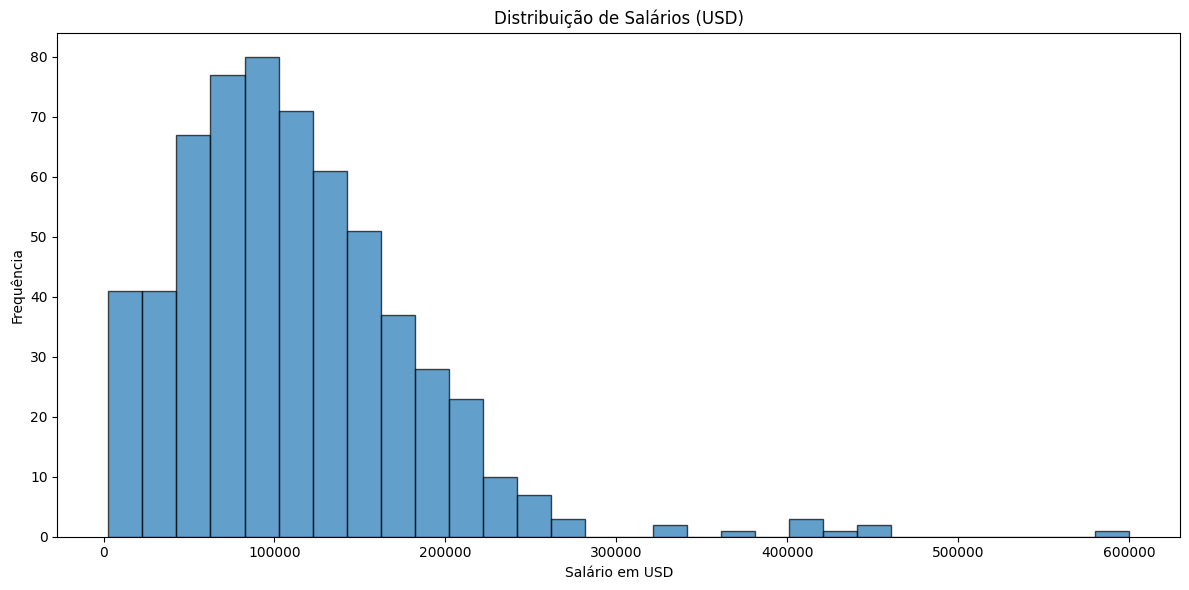

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(df['salary_in_usd'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Salários (USD)')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


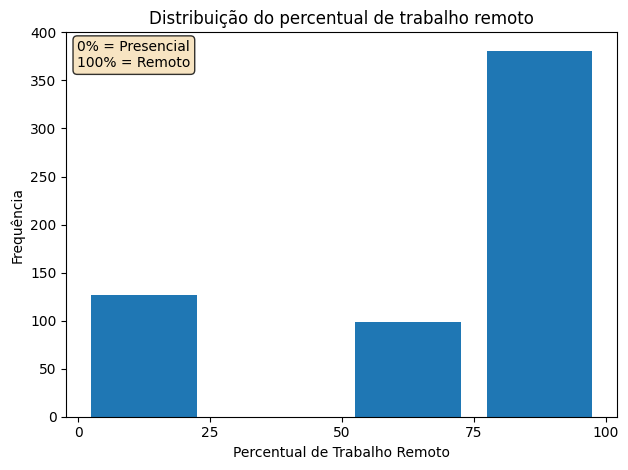

In [ ]:
plt.figure()
plt.hist(df['remote_ratio'], bins=[0,25,50,75,100], rwidth=0.8)
plt.title('Distribuição do percentual de trabalho remoto')
plt.xlabel('Percentual de Trabalho Remoto')
plt.ylabel('Frequência')
plt.xticks([0,25,50,75,100])

plt.text(0.02, 0.98, '0% = Presencial\n100% = Remoto',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

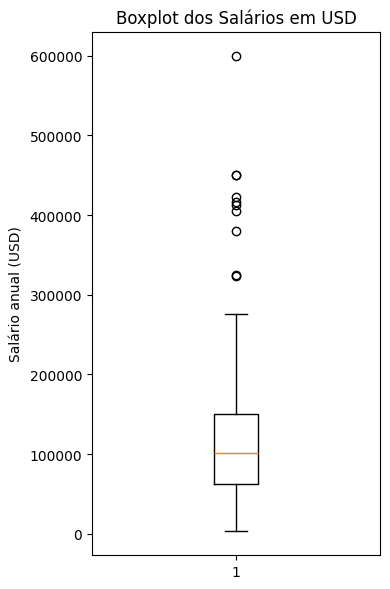

In [131]:
plt.figure(figsize=(4,6))
plt.boxplot(df['salary_in_usd'], vert=True)
plt.title('Boxplot dos Salários em USD')
plt.ylabel('Salário anual (USD)')
plt.tight_layout()
plt.show()

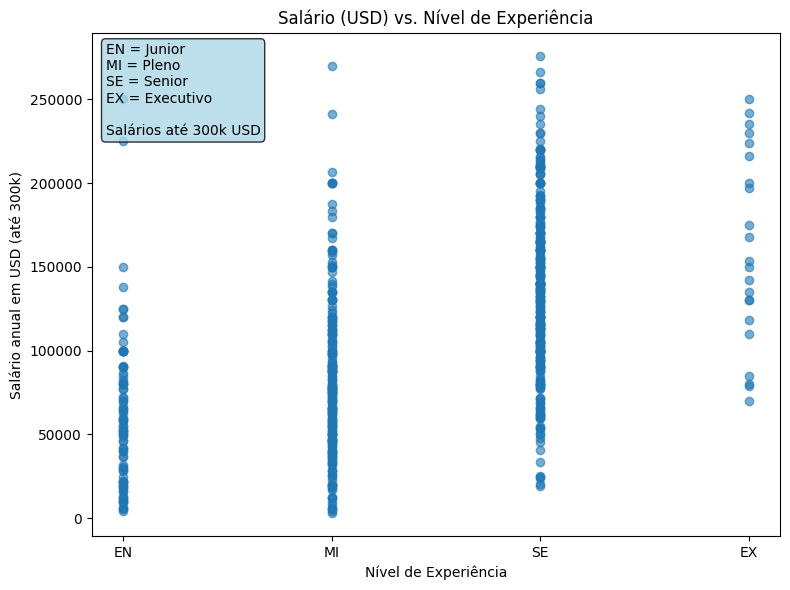

In [ ]:
exp_order = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['exp_code'] = df['experience_level'].map(exp_order)

# Filtrar salários até 300k p remover outliers e ficar mais visivel
df_filtered = df[df['salary_in_usd'] <= 300000]

plt.figure(figsize=(8,6))
plt.scatter(df_filtered['exp_code'], df_filtered['salary_in_usd'], alpha=0.6)
plt.title('Salário (USD) vs. Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário anual em USD (até 300k)')
plt.xticks([1,2,3,4], ['EN','MI','SE','EX'])

plt.text(0.02, 0.98, 'EN = Junior\nMI = Pleno\nSE = Senior\nEX = Executivo\n\nSalários até 300k USD',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()


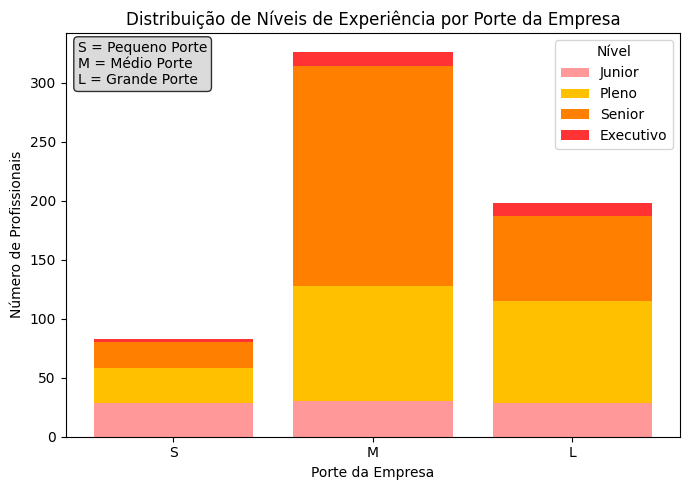

In [121]:
import numpy as np

ctab = (pd.crosstab(df['company_size'],
                    df['experience_level'])
          .reindex(index=['S','M','L'], columns=['EN','MI','SE','EX']))


plt.figure(figsize=(7,5))
bottom = np.zeros(len(ctab))
colors = ['#ff9999','#ffc000','#ff8000','#ff3333']
labels = ['Junior', 'Pleno', 'Senior', 'Executivo']
for idx, exp in enumerate(ctab.columns):
    plt.bar(ctab.index, ctab[exp], bottom=bottom, label=labels[idx], color=colors[idx])
    bottom += ctab[exp].values #type: ignore

plt.title('Distribuição de Níveis de Experiência por Porte da Empresa')
plt.xlabel('Porte da Empresa')
plt.ylabel('Número de Profissionais')
plt.legend(title='Nível')

plt.text(0.02, 0.98, 'S = Pequeno Porte\nM = Médio Porte\nL = Grande Porte',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()


In [133]:
mean_exp = (df.groupby('experience_level')['salary_in_usd']
              .mean()
              .reindex(['EN','MI','SE','EX'])
              .round(0)
              .astype(int)
              .rename('Média Salarial (USD)'))
mean_size = (df.groupby('company_size')['salary_in_usd']
               .mean()
               .reindex(['S','M','L'])
               .round(0)
               .astype(int)
               .rename('Média Salarial (USD)'))


In [134]:
pivot_mean = (df.pivot_table(values='salary_in_usd',
                             index='experience_level',
                             columns='company_size',
                             aggfunc='mean')
                .reindex(index=['EN','MI','SE','EX'], columns=['S','M','L'])
                .round(0)
                .astype(int))


print(pivot_mean.to_markdown())

| experience_level   |      S |      M |      L |
|:-------------------|-------:|-------:|-------:|
| EN                 |  62185 |  50322 |  72813 |
| MI                 |  51159 |  90091 |  98030 |
| SE                 | 116027 | 137816 | 147591 |
| EX                 | 201309 | 178242 | 221942 |
